In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm

np.random.seed(97)

In [2]:
df = pd.read_csv('Auto_sales.csv', sep=';', decimal=',', parse_dates=['Date'], index_col='Date')

In [3]:
df

,Auto_sales
Date,
2001-01-01,586.9
2001-02-01,695.2
2001-03-01,783.9
2001-04-01,684.5
2001-05-01,808.8
...,...
2020-12-01,332.9
2021-01-01,247.5
2021-02-01,262.2


In [4]:
df=df.iloc[120:]

In [5]:
df

,Auto_sales
Date,
2011-01-01,380.3
2011-02-01,483.0
2011-03-01,648.5
2011-04-01,596.0
2011-05-01,534.6
...,...
2020-12-01,332.9
2021-01-01,247.5
2021-02-01,262.2


In [6]:
df.dropna()

,Auto_sales
Date,
2011-01-01,380.3
2011-02-01,483.0
2011-03-01,648.5
2011-04-01,596.0
2011-05-01,534.6
...,...
2020-12-01,332.9
2021-01-01,247.5
2021-02-01,262.2


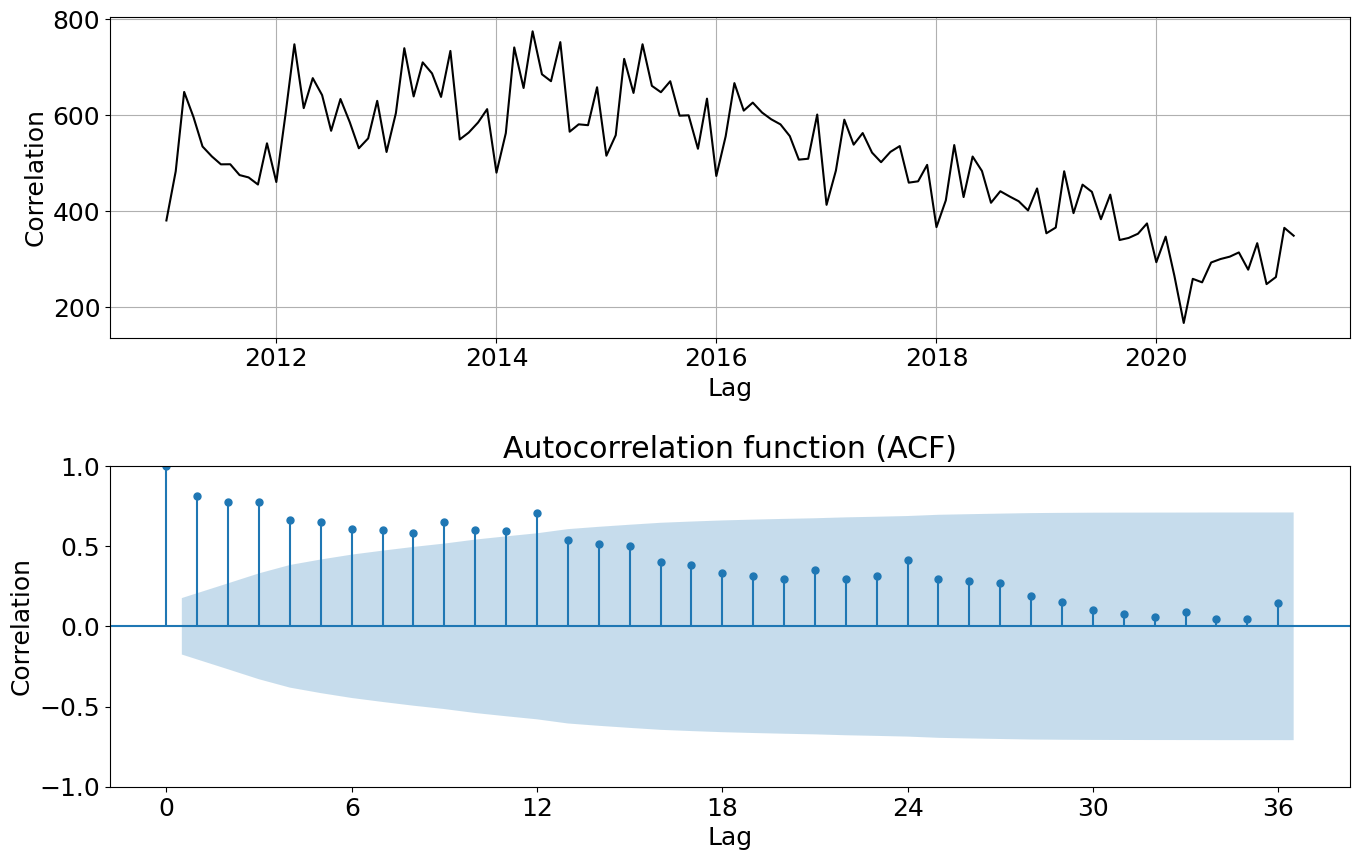

In [8]:
plt.rcParams.update({'font.size': 18})
fig, axes = plt.subplots(2,1,figsize=(16,10), dpi= 100)
plt.subplots_adjust(hspace = 0.4)

# raw data
axes[0].plot(df.index, df.Auto_sales, \
    color='k', label='Actual vehicle sales')
axes[0].set_xlabel('Lag')
axes[0].set_ylabel('Correlation')
axes[0].grid()

# ACF
plot_acf(df.Auto_sales, alpha=0.05, ax=axes[1], \
    title='Autocorrelation function (ACF)', lags=36)
axes[1].set_xlabel('Lag')
axes[1].set_ylabel('Correlation')
axes[1].set_xticks(np.arange(0,37,6))

In [10]:
X = df.Auto_sales
t = np.arange(len(X))

exog_var = np.stack((t,t**2), axis=1)

In [15]:
reg_with_intercept = sm.add_constant(exog_var)
reg_model = sm.OLS(X,reg_with_intercept)
reg_fit = reg_model.fit()

In [17]:
print(reg_fit.summary())

                            OLS Regression Results                            
Dep. Variable:             Auto_sales   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     166.7
Date:                Wed, 16 Oct 2024   Prob (F-statistic):           1.70e-35
Time:                        14:28:14   Log-Likelihood:                -699.52
No. Observations:                 124   AIC:                             1405.
Df Residuals:                     121   BIC:                             1414.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        525.7649     18.303     28.726      0.0

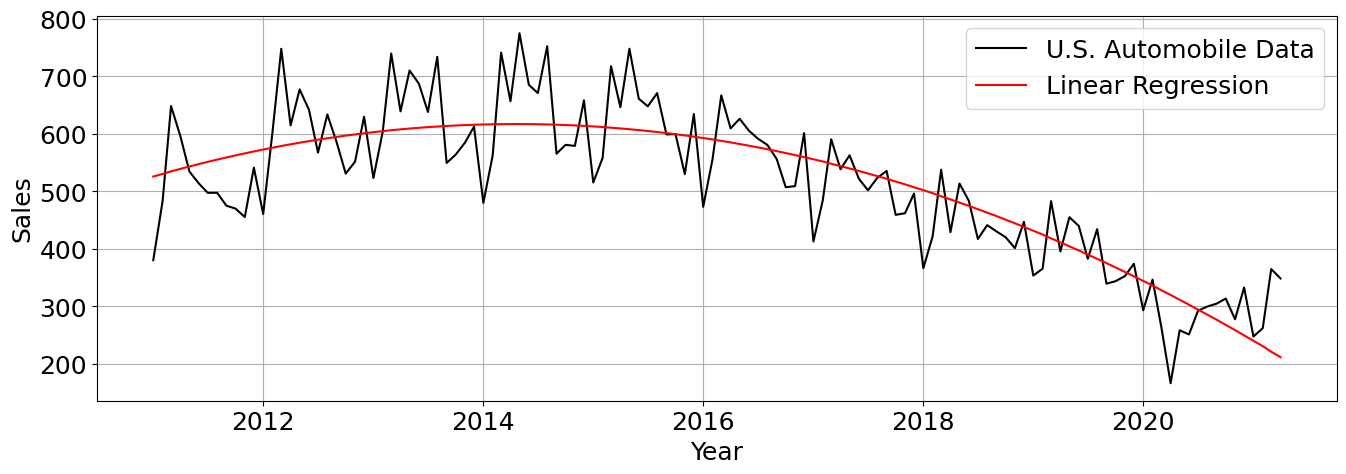

In [18]:
plt.figure(figsize=(16,5), dpi=100)

# original data
plt.plot(X, color='k', label='U.S. Automobile Data')

# regression curve
plt.plot(df.index, reg_fit.fittedvalues, \
    color='red', label='Linear Regression')

# add artists
plt.gca().set(xlabel='Year', ylabel='Sales')
plt.legend()
plt.grid()
plt.show()

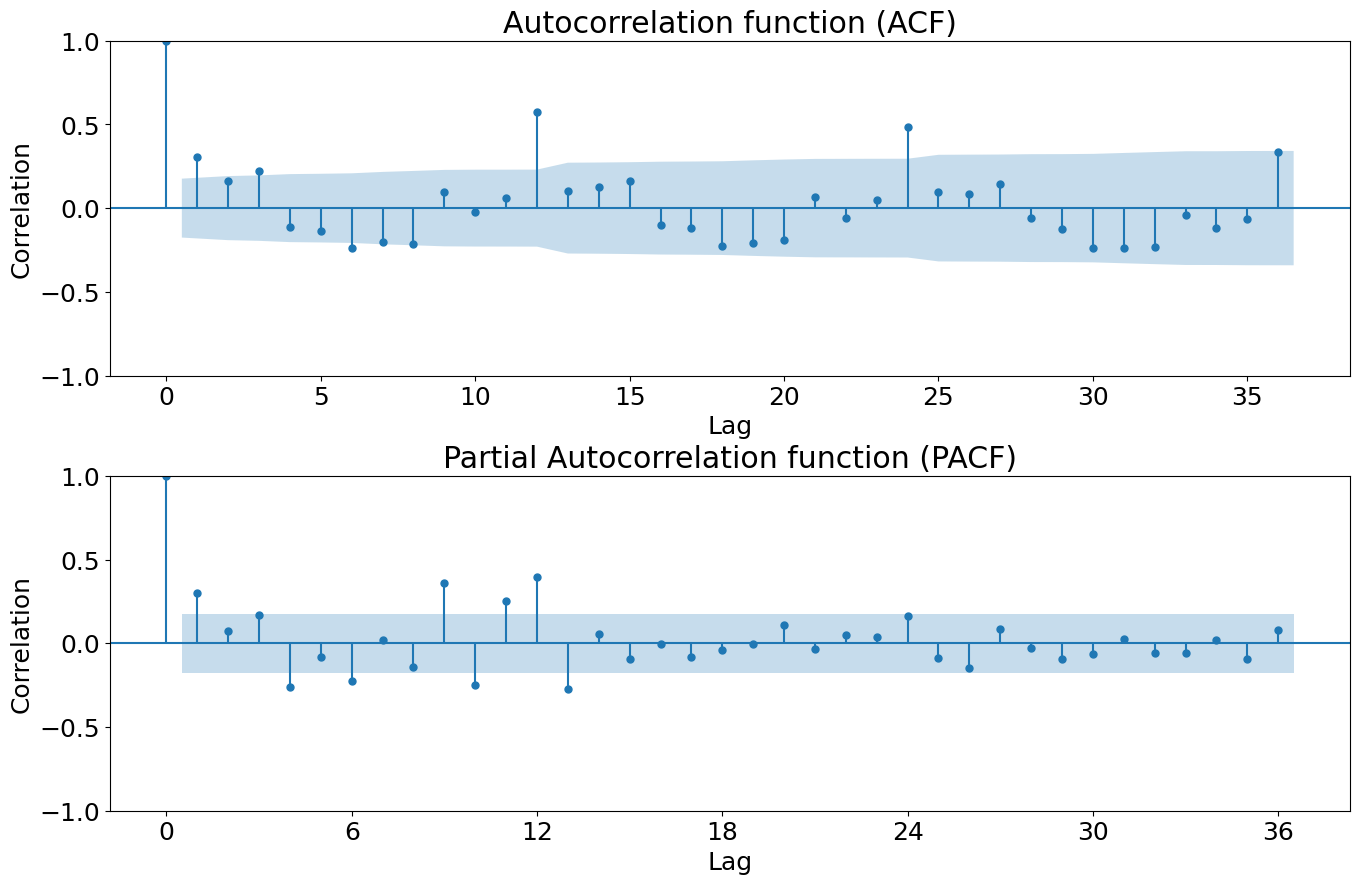

In [19]:
# %% plot ACF & PACF of regression residuals
def plot_acf_pacf(data):
    
    # prepare the plot
    fig, axes = plt.subplots(2, 1, \
        figsize=(16,10), dpi=100)
    plt.subplots_adjust(hspace=0.3)

    # ACF
    plot_acf(data, alpha=0.05, ax=axes[0], lags=36, \
        title='Autocorrelation function (ACF)')
    axes[0].set_xlabel('Lag')
    axes[0].set_ylabel('Correlation')

    # PACF
    plot_pacf(data, alpha=0.05, ax=axes[1], lags=36, \
        title='Partial Autocorrelation function (PACF)')
    axes[1].set_xlabel('Lag')
    axes[1].set_ylabel('Correlation')
    axes[1].set_xticks(np.arange(0,37,6))

plot_acf_pacf(reg_fit.resid)

In [20]:
order = (0, 0, 0)
seasonal_order = (1, 0, 0, 12)
model = SARIMAX(endog=X, exog=exog_var, \
    trend='c', order=order, \
    seasonal_order=seasonal_order, \
    enforce_stationarity=True, \
    enforce_invertibility=True)
m_sarimax = model.fit()

c:\Users\mrosk\.conda\envs\ml311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\mrosk\.conda\envs\ml311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\mrosk\.conda\envs\ml311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


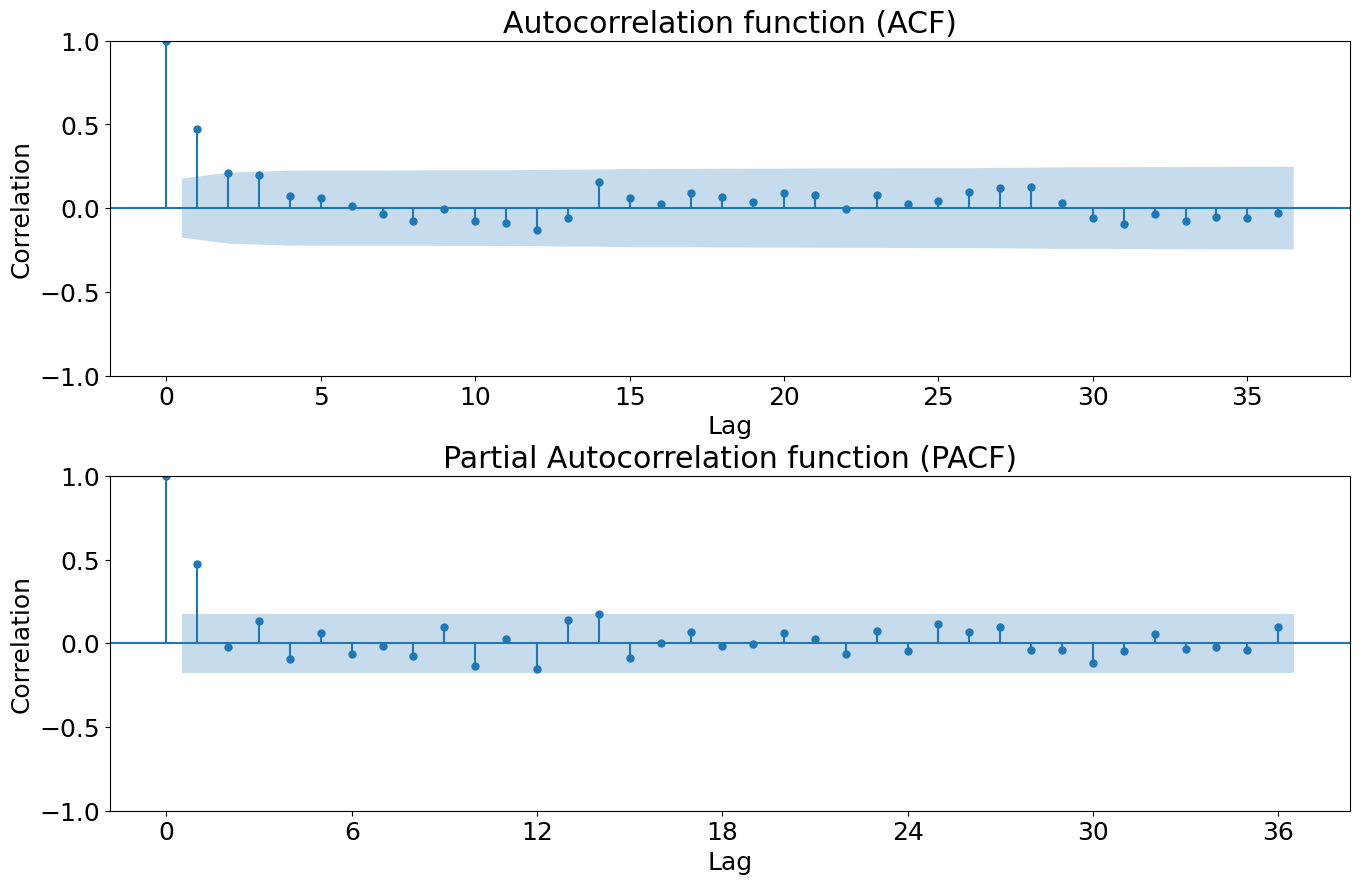

In [21]:
plot_acf_pacf(m_sarimax.resid)


In [24]:
order = (1, 0, 0)
seasonal_order = (1, 0, 0, 12)
model = SARIMAX(endog=X, exog=exog_var, \
    trend='c', order=order, \
    seasonal_order=seasonal_order, \
    enforce_stationarity=True, \
    enforce_invertibility=True)
m_sarimax = model.fit()

c:\Users\mrosk\.conda\envs\ml311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\mrosk\.conda\envs\ml311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\mrosk\.conda\envs\ml311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                         Auto_sales   No. Observations:                  124
Model:             SARIMAX(1, 0, 0)x(1, 0, 0, 12)   Log Likelihood                -648.973
Date:                            Wed, 16 Oct 2024   AIC                           1309.947
Time:                                    14:31:04   BIC                           1326.868
Sample:                                01-01-2011   HQIC                          1316.821
                                     - 04-01-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     69.1145     17.029      4.059      0.000      35.738     102.491
x1             5.3455      1.210   

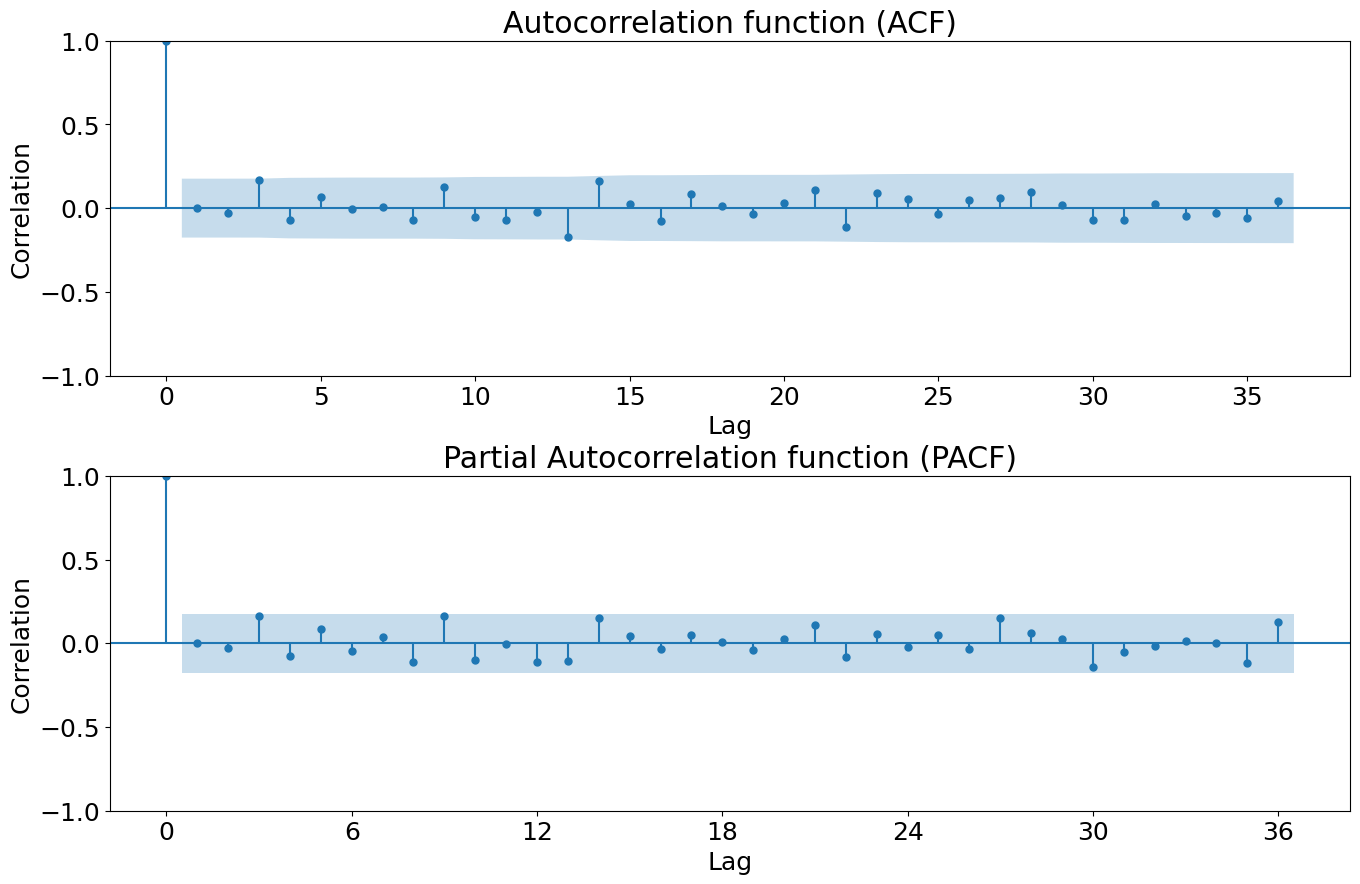

In [25]:
print(m_sarimax.summary())

# %% plot ACF & PACF of SARIMAX residuals
plot_acf_pacf(m_sarimax.resid)